# Speed up you Pandas Code

In [1]:
import pandas as pd
import numpy as np

In [62]:
import timeit
%load_ext timeit

The timeit module is not an IPython extension.


In [46]:
def get_data(size = 10_000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0,100,size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.choice(['pizza','taco','ice-cream'],size)
    df['hate_food'] = np.random.choice(['broccoli','candy corn','eggs'],size)
    return df

In [53]:
import pandas as pd
import numpy as np

def get_data(size=10_000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.rand(size)
    df['favorite_food'] = np.random.choice(['pizza', 'taco', 'ice-cream'], size)
    df['hate_food'] = np.random.choice(['broccoli', 'candy corn', 'eggs'], size)
    return df


In [54]:
get_data()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,8,3,0.609639,ice-cream,broccoli
1,49,8,0.918700,pizza,eggs
2,63,4,0.110193,ice-cream,broccoli
3,92,1,0.660034,ice-cream,candy corn
4,41,7,0.927568,pizza,broccoli
...,...,...,...,...,...
9995,29,0,0.735097,taco,broccoli
9996,79,7,0.947481,ice-cream,broccoli
9997,60,6,0.399197,ice-cream,candy corn
9998,61,7,0.479151,ice-cream,candy corn


## The Problem
Reward calculation:

- If they were in bed for more thatn 5 hours And they were sleeping form more than 50% we give them their favorite food.
- Other wise we give them their hate food.
- If they are over 90 years  old their favorite food regardless.

In [55]:
def reward_calc(row):
    if row['age'] >= 90:
        return row['favorite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favorite_food']
    return row['hate_food']

## Level 1 - Loop

In [77]:
df = get_data()

In [78]:
%%timeit
for index, row in df.iterrows():
    df.loc[index,'reward'] = reward_calc(row)

2.44 s ± 360 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 2 - Apply

In [72]:
df = get_data()

In [73]:
%%timeit
df['reward'] = df.apply(reward_calc,axis=1)


165 ms ± 9.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Level 3 - Vectorized

In [74]:
df = get_data()

In [75]:
%%timeit
df['reward'] = df['hate_food']
df.loc[
((df['pct_sleeping'] > 0.5) & 
 (df['time_in_bed'] > 5)) | (df['age'] > 90) ,
'reward'] = df['favorite_food']

2.22 ms ± 602 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
results = pd.DataFrame(
    [
    ["loop",2440,360],
    ["apply",165,9.96],
    ["vecorized",2.22,0.602]
    ],
    columns=["type","mean","std"],
)
results

,type,mean,std
0,loop,2440.00,360.000
1,apply,165.00,9.960
2,vecorized,2.22,0.602


<AxesSubplot:title={'center':'Time to run function reward_calc'}, xlabel='type'>

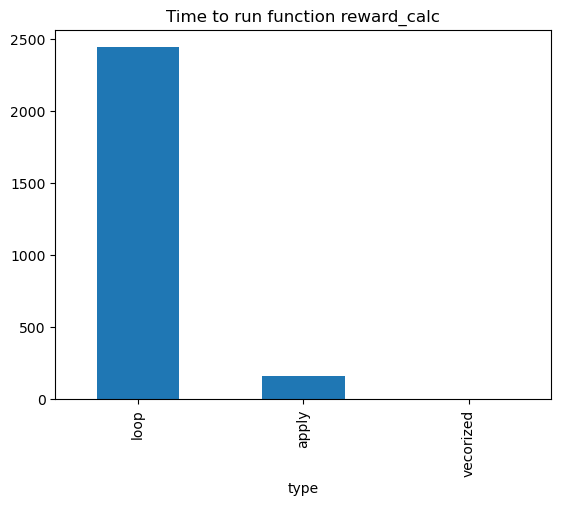

In [88]:
results.set_index('type')['mean'].plot(kind='bar',title='Time to run function reward_calc')